# Telecom Deliquency Prediction

<img src='dsflow.png'>


<img src="Data Description.png">

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## 2. Data Collection & Data Exploration

In [2]:
#load data
df = pd.read_csv(r"E:\MLIoT\ML\dataset\telecom\telecom deliquency\telecom deliquency dataset.csv")
df.shape

(209593, 36)

In [3]:
df.head().T

0            1            2            3  \
label                           0            1            1            1   
msisdn                21408I70789  76462I70374  17943I70372  55773I70781   
aon                           272          712          535          241   
daily_decr30              3055.05        12122         1398       21.228   
daily_decr90              3065.15      12124.8         1398       21.228   
rental30                   220.13      3691.26       900.13       159.42   
rental90                   260.13      3691.26       900.13       159.42   
last_rech_date_ma               2           20            3           41   
last_rech_date_da               0            0            0            0   
last_rech_amt_ma             1539         5787         1539          947   
cnt_ma_rech30                   2            1            1            0   
fr_ma_rech30                   21            0            0            0   
sumamnt_ma_rech30            3078         5787         1539            0   
medianamnt_ma_rech30         1539         5787         1539            0   
medianmarechprebal30          7.5        61.04        66.32            0   
cnt_ma_rech90                   2            1            1            1   
fr_ma_rech90                   21            0            0            0   
sumamnt_ma_rech90            3078         5787         1539          947   
medianamnt_ma_rech90         1539         5787         1539          947   
medianmarechprebal90          7.5        61.04        66.32          2.5   
cnt_da_rech30                   0            0            0            0   
fr_da_rech30                    0            0            0            0   
cnt_da_rech90                   0            0            0            0   
fr_da_rech90                    0            0            0            0   
cnt_loans30                     2            1            1            2   
amnt_loans30                   12           12            6           12   
maxamnt_loans30                 6           12            6            6   
medianamnt_loans30              0            0            0            0   
cnt_loans90                     2            1            1            2   
amnt_loans90                   12           12            6           12   
maxamnt_loans90                 6           12            6            6   
medianamnt_loans90              0            0            0            0   
payback30                      29            0            0            0   
payback90                      29            0            0            0   
pcircle                       UPW          UPW          UPW          UPW   
pdate                  20-07-2016   10-08-2016   19-08-2016   06-06-2016   

                                4  
label                           1  
msisdn                03813I82730  
aon                           947  
daily_decr30              150.619  
daily_decr90              150.619  
rental30                   1098.9  
rental90                   1098.9  
last_rech_date_ma               4  
last_rech_date_da               0  
last_rech_amt_ma             2309  
cnt_ma_rech30                   7  
fr_ma_rech30                    2  
sumamnt_ma_rech30           20029  
medianamnt_ma_rech30         2309  
medianmarechprebal30           29  
cnt_ma_rech90                   8  
fr_ma_rech90                    2  
sumamnt_ma_rech90           23496  
medianamnt_ma_rech90         2888  
medianmarechprebal90           35  
cnt_da_rech30                   0  
fr_da_rech30                    0  
cnt_da_rech90                   0  
fr_da_rech90                    0  
cnt_loans30                     7  
amnt_loans30                   42  
maxamnt_loans30                 6  
medianamnt_loans30              0  
cnt_loans90                     7  
amnt_loans90                   42  
maxamnt_loans90                 6  
medianamnt_loans90              0  
payback30                 2.333

In [4]:
# unwanted columns - msisdn, pdate

In [5]:
df.describe().T

count          mean           std           min  \
label                 209593.0      0.875177      0.330519      0.000000   
aon                   209593.0   8112.343445  75696.082531    -48.000000   
daily_decr30          209593.0   5381.402289   9220.623400    -93.012667   
daily_decr90          209593.0   6082.515068  10918.812767    -93.012667   
rental30              209593.0   2692.581910   4308.586781 -23737.140000   
rental90              209593.0   3483.406534   5770.461279 -24720.580000   
last_rech_date_ma     209593.0   3755.847800  53905.892230    -29.000000   
last_rech_date_da     209593.0   3712.202921  53374.833430    -29.000000   
last_rech_amt_ma      209593.0   2064.452797   2370.786034      0.000000   
cnt_ma_rech30         209593.0      3.978057      4.256090      0.000000   
fr_ma_rech30          209593.0   3737.355121  53643.625172      0.000000   
sumamnt_ma_rech30     209593.0   7704.501157  10139.621714      0.000000   
medianamnt_ma_rech30  209593.0   1812.817952   2070.864620      0.000000   
medianmarechprebal30  209593.0   3851.927942  54006.374433   -200.000000   
cnt_ma_rech90         209593.0      6.315430      7.193470      0.000000   
fr_ma_rech90          209593.0      7.716780     12.590251      0.000000   
sumamnt_ma_rech90     209593.0  12396.218352  16857.793882      0.000000   
medianamnt_ma_rech90  209593.0   1864.595821   2081.680664      0.000000   
medianmarechprebal90  209593.0     92.025541    369.215658   -200.000000   
cnt_da_rech30         209593.0    262.578110   4183.897978      0.000000   
fr_da_rech30          209593.0   3749.494447  53885.414979      0.000000   
cnt_da_rech90         209593.0      0.041495      0.397556      0.000000   
fr_da_rech90          209593.0      0.045712      0.951386      0.000000   
cnt_loans30           209593.0      2.758981      2.554502      0.000000   
amnt_loans30          209593.0     17.952021     17.379741      0.000000   
maxamnt_loans30       209593.0    274.658747   4245.264648      0.000000   
medianamnt_loans30    209593.0      0.054029      0.218039      0.000000   
cnt_loans90           209593.0     18.520919    224.797423      0.000000   
amnt_loans90          209593.0     23.645398     26.469861      0.000000   
maxamnt_loans90       209593.0      6.703134      2.103864      0.000000   
medianamnt_loans90    209593.0      0.046077      0.200692      0.000000   
payback30             209593.0      3.398826      8.813729      0.000000   
payback90             209593.0      4.321485     10.308108      0.000000   

                           25%          50%       75%            max  
label                    1.000     1.000000      1.00       1.000000  
aon                    246.000   527.000000    982.00  999860.755200  
daily_decr30            42.440  1469.175667   7244.00  265926.000000  
daily_decr90            42.692  1500.000000   7802.79  320630.000000  
rental30               280.420  1083.570000   3356.94  198926.110000  
rental90               300.260  1334.000000   4201.79  200148.110000  
last_rech_date_ma        1.000     3.000000      7.00  998650.377700  
last_rech_date_da        0.000     0.000000      0.00  999171.809400  
last_rech_amt_ma       770.000  1539.000000   2309.00   55000.000000  
cnt_ma_rech30            1.000     3.000000      5.00     203.000000  
fr_ma_rech30             0.000     2.000000      6.00  999606.368100  
sumamnt_ma_rech30     1540.000  4628.000000  10010.00  810096.000000  
medianamnt_ma_rech30   770.000  1539.000000   1924.00   55000.000000  
medianmarechprebal30    11.000    33.900000     83.00  999479.419300  
cnt_ma_rech90            2.000     4.000000      8.00     336.000000  
fr_ma_rech90             0.000     2.000000      8.00      88.000000  
sumamnt_ma_rech90     2317.000  7226.000000  16000.00  953036.000000  
medianamnt_ma_rech90   773.000  1539.000000   1924.00   55000.000000  
medianmarechprebal90    14.600    36.000000     79.31   41456.500000  
cnt_da_rech30       

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 36 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 209593 non-null  int64  
 1   msisdn                209593 non-null  object 
 2   aon                   209593 non-null  float64
 3   daily_decr30          209593 non-null  float64
 4   daily_decr90          209593 non-null  float64
 5   rental30              209593 non-null  float64
 6   rental90              209593 non-null  float64
 7   last_rech_date_ma     209593 non-null  float64
 8   last_rech_date_da     209593 non-null  float64
 9   last_rech_amt_ma      209593 non-null  int64  
 10  cnt_ma_rech30         209593 non-null  int64  
 11  fr_ma_rech30          209593 non-null  float64
 12  sumamnt_ma_rech30     209593 non-null  float64
 13  medianamnt_ma_rech30  209593 non-null  float64
 14  medianmarechprebal30  209593 non-null  float64
 15  

In [7]:
len(df.msisdn.unique())

186243

In [8]:
len(df.pcircle.unique())

1

In [9]:
df.pcircle.unique()

array(['UPW'], dtype=object)

In [10]:
df.skew()

label                   -2.270254
aon                     10.392949
daily_decr30             3.946230
daily_decr90             4.252565
rental30                 4.521929
rental90                 4.437681
last_rech_date_ma       14.790974
last_rech_date_da       14.814857
last_rech_amt_ma         3.781149
cnt_ma_rech30            3.283842
fr_ma_rech30            14.772833
sumamnt_ma_rech30        6.386787
medianamnt_ma_rech30     3.512324
medianmarechprebal30    14.779875
cnt_ma_rech90            3.425254
fr_ma_rech90             2.285423
sumamnt_ma_rech90        4.897950
medianamnt_ma_rech90     3.752706
medianmarechprebal90    44.880503
cnt_da_rech30           17.818364
fr_da_rech30            14.776430
cnt_da_rech90           27.267278
fr_da_rech90            28.988083
cnt_loans30              2.713421
amnt_loans30             2.975719
maxamnt_loans30         17.658052
medianamnt_loans30       4.551043
cnt_loans90             16.594408
amnt_loans90             3.150006
maxamnt_loans9

## 3. Data Cleaning

In [11]:
df.label.value_counts(normalize=True)

1    0.875177
0    0.124823
Name: label, dtype: float64

In [12]:
# check for missing values
df.isnull().sum()

label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

In [13]:
# check for duplicated rows
df.duplicated().sum()

1

In [14]:
# droppping duplicates
df.drop_duplicates(inplace=True)

In [15]:
# drop unwanted columns
df.drop(["msisdn","pdate",'pcircle'],axis=1,inplace=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 209592 entries, 0 to 209592
Data columns (total 33 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 209592 non-null  int64  
 1   aon                   209592 non-null  float64
 2   daily_decr30          209592 non-null  float64
 3   daily_decr90          209592 non-null  float64
 4   rental30              209592 non-null  float64
 5   rental90              209592 non-null  float64
 6   last_rech_date_ma     209592 non-null  float64
 7   last_rech_date_da     209592 non-null  float64
 8   last_rech_amt_ma      209592 non-null  int64  
 9   cnt_ma_rech30         209592 non-null  int64  
 10  fr_ma_rech30          209592 non-null  float64
 11  sumamnt_ma_rech30     209592 non-null  float64
 12  medianamnt_ma_rech30  209592 non-null  float64
 13  medianmarechprebal30  209592 non-null  float64
 14  cnt_ma_rech90         209592 non-null  int64  
 15  

In [17]:
df.shape

(209592, 33)

In [18]:
#check for outliers
df.skew()

label                   -2.270245
aon                     10.392923
daily_decr30             3.946219
daily_decr90             4.252553
rental30                 4.521921
rental90                 4.437670
last_rech_date_ma       14.790938
last_rech_date_da       14.814821
last_rech_amt_ma         3.781141
cnt_ma_rech30            3.283838
fr_ma_rech30            14.772797
sumamnt_ma_rech30        6.386774
medianamnt_ma_rech30     3.512314
medianmarechprebal30    14.779840
cnt_ma_rech90            3.425244
fr_ma_rech90             2.285415
sumamnt_ma_rech90        4.897937
medianamnt_ma_rech90     3.752696
medianmarechprebal90    44.880396
cnt_da_rech30           17.818321
fr_da_rech30            14.776395
cnt_da_rech90           27.267213
fr_da_rech90            28.988013
cnt_loans30              2.713426
amnt_loans30             2.975720
maxamnt_loans30         17.658009
medianamnt_loans30       4.551031
cnt_loans90             16.594368
amnt_loans90             3.149999
maxamnt_loans9

In [19]:
df.aon.max()

999860.7552

In [20]:
df.aon.quantile(0.99)

2420.0899999999965

In [21]:
df2 = df[df.aon<df.aon.quantile(0.99)]
df2.shape

(207496, 33)

In [22]:
df.label.value_counts()

1    183430
0     26162
Name: label, dtype: int64

In [23]:
df2.label.value_counts()

1    181625
0     25871
Name: label, dtype: int64

In [24]:
df2.skew()

label                   -2.272207
aon                      0.944984
daily_decr30             3.930636
daily_decr90             4.249075
rental30                 4.531733
rental90                 4.442035
last_rech_date_ma       14.795886
last_rech_date_da       14.805897
last_rech_amt_ma         3.757491
cnt_ma_rech30            3.284978
fr_ma_rech30            14.756316
sumamnt_ma_rech30        6.393722
medianamnt_ma_rech30     3.459655
medianmarechprebal30    14.822187
cnt_ma_rech90            3.431016
fr_ma_rech90             2.288640
sumamnt_ma_rech90        4.911325
medianamnt_ma_rech90     3.705475
medianmarechprebal90    44.935475
cnt_da_rech30           17.860676
fr_da_rech30            14.789794
cnt_da_rech90           27.353295
fr_da_rech90            29.258080
cnt_loans30              2.703805
amnt_loans30             2.965542
maxamnt_loans30         17.622940
medianamnt_loans30       4.555080
cnt_loans90             16.597000
amnt_loans90             3.151147
maxamnt_loans9

In [25]:
print(df2.shape)
for col in list(df2.columns):
    df2 = df2[df2[col]>=0]
print(df2.shape)

(207496, 33)
(195345, 33)


In [26]:
df2.label.value_counts()

1    172279
0     23066
Name: label, dtype: int64

In [27]:
df2.skew()

label                   -2.367051
aon                      0.961392
daily_decr30             3.856837
daily_decr90             4.167616
rental30                 4.489944
rental90                 4.386981
last_rech_date_ma       14.649404
last_rech_date_da       14.695652
last_rech_amt_ma         3.848888
cnt_ma_rech30            3.253983
fr_ma_rech30            14.669947
sumamnt_ma_rech30        3.886160
medianamnt_ma_rech30     3.504610
medianmarechprebal30    14.847234
cnt_ma_rech90            3.393468
fr_ma_rech90             2.306918
sumamnt_ma_rech90        4.074531
medianamnt_ma_rech90     3.713268
medianmarechprebal90    45.547866
cnt_da_rech30           17.783659
fr_da_rech30            14.814224
cnt_da_rech90           26.982398
fr_da_rech90            28.009033
cnt_loans30              2.663837
amnt_loans30             2.923894
maxamnt_loans30         17.617949
medianamnt_loans30       4.591029
cnt_loans90             16.654377
amnt_loans90             3.092800
maxamnt_loans9

In [28]:
df2.last_rech_date_ma.describe()

count    195345.000000
mean       3826.649322
std       54408.602560
min           0.000000
25%           1.000000
50%           3.000000
75%           7.000000
max      998650.377700
Name: last_rech_date_ma, dtype: float64

In [29]:
df2.last_rech_date_ma.quantile(0.9949)

109.74559999996563

In [30]:
print(df2.shape)
df2 = df2[df2.last_rech_date_ma<=df2.last_rech_date_ma.quantile(0.9949)]
print(df2.shape)

(195345, 33)
(194348, 33)


In [31]:
df2.label.value_counts()

1    171384
0     22964
Name: label, dtype: int64

In [32]:
df2.skew()

label                   -2.365848
aon                      0.961460
daily_decr30             3.851298
daily_decr90             4.167371
rental30                 4.497021
rental90                 4.392047
last_rech_date_ma        3.597366
last_rech_date_da       14.705459
last_rech_amt_ma         3.857278
cnt_ma_rech30            3.185605
fr_ma_rech30            14.661012
sumamnt_ma_rech30        3.884008
medianamnt_ma_rech30     3.510273
medianmarechprebal30    14.884645
cnt_ma_rech90            3.381100
fr_ma_rech90             2.306660
sumamnt_ma_rech90        4.074186
medianamnt_ma_rech90     3.719578
medianmarechprebal90    45.538627
cnt_da_rech30           17.748529
fr_da_rech30            14.784109
cnt_da_rech90           26.942945
fr_da_rech90            27.955584
cnt_loans30              2.659714
amnt_loans30             2.913594
maxamnt_loans30         17.636395
medianamnt_loans30       4.590311
cnt_loans90             16.658015
amnt_loans90             3.088584
maxamnt_loans9

In [33]:
df2.medianmarechprebal90.quantile(0.9995)

5283.580500000913

In [34]:
df2.medianmarechprebal90.max()

41456.5

In [35]:
print(df2.shape)

(194348, 33)


In [36]:
df2 = df2[df2.medianmarechprebal90<=df2.medianmarechprebal90.quantile(0.9995)]
print(df2.shape)

(194250, 33)


In [37]:
df2.skew()

label                   -2.366187
aon                      0.961606
daily_decr30             3.811753
daily_decr90             4.145517
rental30                 4.491935
rental90                 4.392569
last_rech_date_ma        3.601754
last_rech_date_da       14.716121
last_rech_amt_ma         3.856489
cnt_ma_rech30            2.719742
fr_ma_rech30            14.657264
sumamnt_ma_rech30        3.828015
medianamnt_ma_rech30     3.446270
medianmarechprebal30    14.881240
cnt_ma_rech90            2.953799
fr_ma_rech90             2.306436
sumamnt_ma_rech90        4.038081
medianamnt_ma_rech90     3.642349
medianmarechprebal90    10.035321
cnt_da_rech30           17.757741
fr_da_rech30            14.780330
cnt_da_rech90           26.948226
fr_da_rech90            28.059250
cnt_loans30              2.659238
amnt_loans30             2.913099
maxamnt_loans30         17.631905
medianamnt_loans30       4.591854
cnt_loans90             16.662024
amnt_loans90             3.087988
maxamnt_loans9

In [38]:
df2.fr_da_rech90.max()

64

In [39]:
df2.fr_da_rech90.quantile(0.999)

16.0

In [40]:
print(df2.shape)
df2 = df2[df2.fr_da_rech90<=df2.fr_da_rech90.quantile(0.999)]
print(df2.shape)

(194250, 33)
(194063, 33)


In [41]:
df2.skew()

label                   -2.366946
aon                      0.961682
daily_decr30             3.814356
daily_decr90             4.147703
rental30                 4.496710
rental90                 4.396851
last_rech_date_ma        3.603384
last_rech_date_da       14.717283
last_rech_amt_ma         3.854173
cnt_ma_rech30            2.720848
fr_ma_rech30            14.650109
sumamnt_ma_rech30        3.826910
medianamnt_ma_rech30     3.434697
medianmarechprebal30    14.881950
cnt_ma_rech90            2.954542
fr_ma_rech90             2.305638
sumamnt_ma_rech90        4.039803
medianamnt_ma_rech90     3.634339
medianmarechprebal90    10.038194
cnt_da_rech30           17.761835
fr_da_rech30            14.788434
cnt_da_rech90           28.138204
fr_da_rech90            24.585016
cnt_loans30              2.658988
amnt_loans30             2.912641
maxamnt_loans30         17.634117
medianamnt_loans30       4.591793
cnt_loans90             16.653925
amnt_loans90             3.087668
maxamnt_loans9

In [42]:
df2.fr_da_rech90.quantile(0.996)

0.0

In [43]:
df2.fr_da_rech30.quantile(0.992)

0.0

In [44]:
df2.label.value_counts()

1    171147
0     22916
Name: label, dtype: int64

In [45]:
df2.cnt_da_rech30.quantile(0.994)

4.0

In [46]:
df2.cnt_da_rech90.quantile(0.999)

5.0

In [47]:
df2.cnt_da_rech30.max()

99914.44142

## 4. Feature Engineering - Feature selection

#### Correlation Analysis

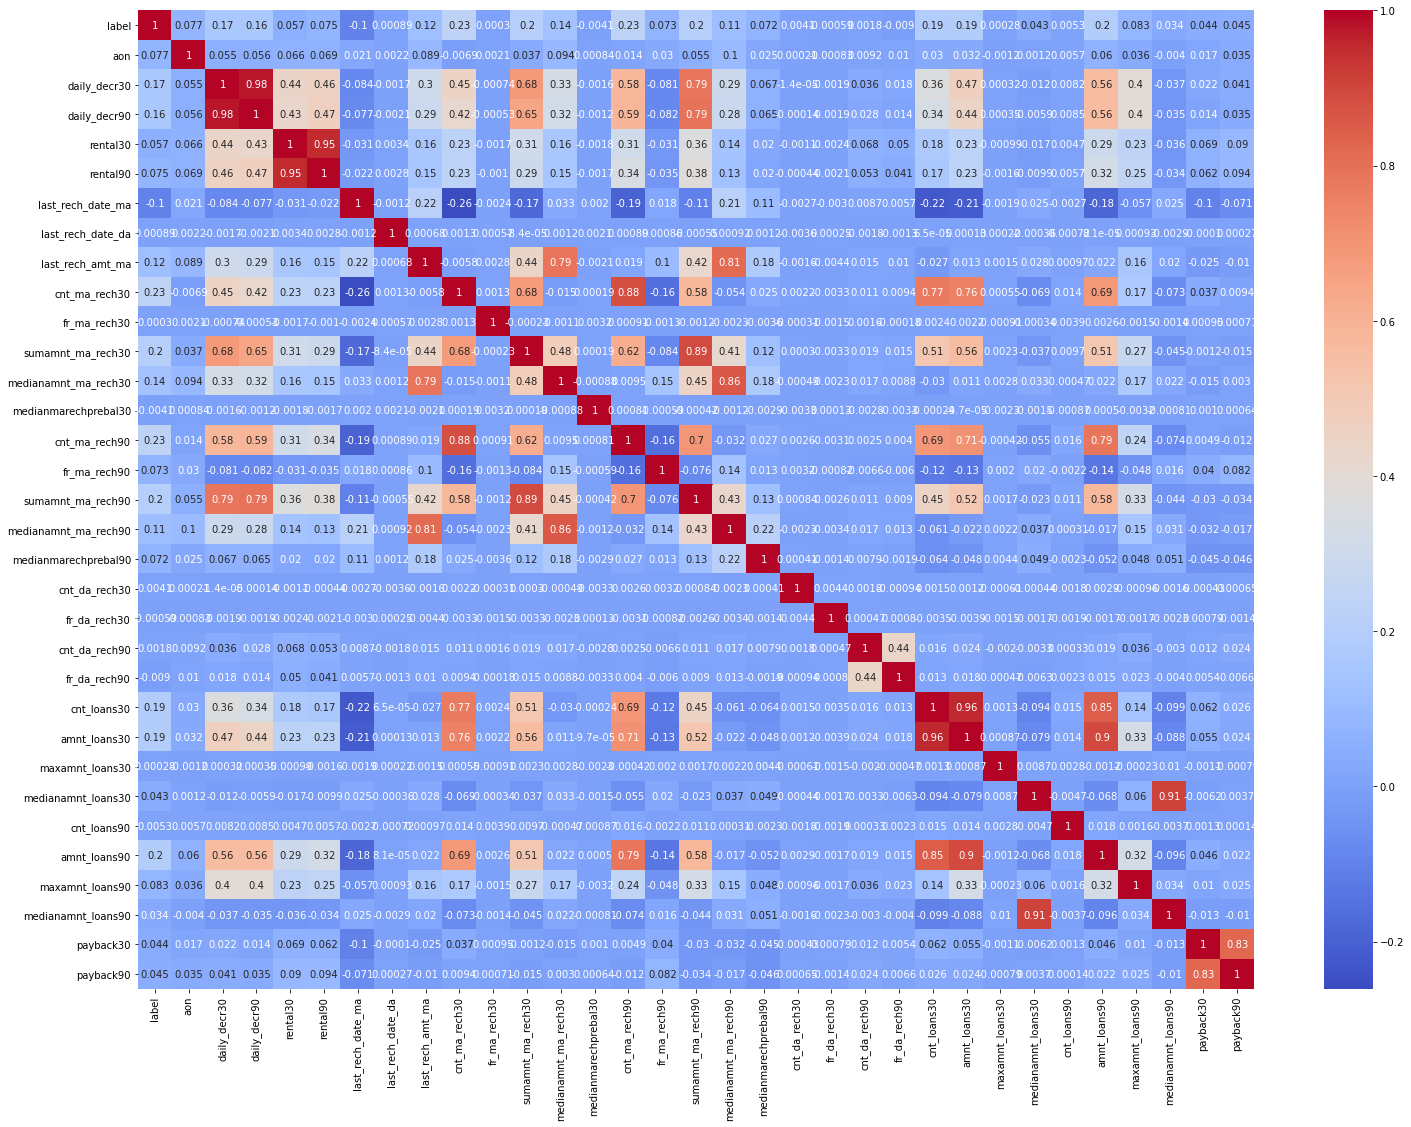

In [48]:
cor = df2.corr()

plt.figure(figsize=(25,18))
sns.heatmap(cor,annot=True,cmap="coolwarm")
plt.show()

#### ANOVA - f test
    for a confidence Interval = 95%, CI = 0.95
        alpha = 1 - CI = 1 - 0.95 = 0.05
        
    - if pvalue > alpha = accept the null hypothesis -> Feature is not informative
    - if pvalue < alpha = reject the null hypothesis -> feature is informative / important

In [49]:
xnum = df2.drop(['label'],axis=1)
y = df2['label']

from sklearn.feature_selection import f_classif
fval,pval = f_classif(xnum,y)

for i in range(len(xnum.columns)): print(xnum.columns[i],pval[i])

aon 3.990833335247724e-255
daily_decr30 0.0
daily_decr90 0.0
rental30 1.8762236735870133e-141
rental90 3.065528794551708e-237
last_rech_date_ma 0.0
last_rech_date_da 0.6936847583339635
last_rech_amt_ma 0.0
cnt_ma_rech30 0.0
fr_ma_rech30 0.8931396308423172
sumamnt_ma_rech30 0.0
medianamnt_ma_rech30 0.0
medianmarechprebal30 0.06874926987534379
cnt_ma_rech90 0.0
fr_ma_rech90 6.933152676856099e-228
sumamnt_ma_rech90 0.0
medianamnt_ma_rech90 0.0
medianmarechprebal90 4.880100892772303e-224
cnt_da_rech30 0.06816011555205145
fr_da_rech30 0.7943202645617164
cnt_da_rech90 0.4333810570045096
fr_da_rech90 7.365812815354712e-05
cnt_loans30 0.0
amnt_loans30 0.0
maxamnt_loans30 0.9027978678962788
medianamnt_loans30 4.80168113495386e-79
cnt_loans90 0.01969463813363153
amnt_loans90 0.0
maxamnt_loans90 1.4326857162040071e-291
medianamnt_loans90 2.6262735129205334e-50
payback30 1.163062563036804e-82
payback90 7.038359583489045e-86


In [50]:
# irrelevant columns = cnt_loans90, maxamnt_loans30, cnt_da_rech90, fr_da_rech30, cnt_da_rech30, medianmarechprebal30, 
# fr_ma_rech30, last_rech_date_da, 

In [51]:
df2.columns

Index(['label', 'aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_date_ma', 'last_rech_date_da', 'last_rech_amt_ma',
       'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30',
       'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90',
       'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90',
       'medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30',
       'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'amnt_loans30',
       'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90', 'amnt_loans90',
       'maxamnt_loans90', 'medianamnt_loans90', 'payback30', 'payback90'],
      dtype='object')

In [52]:
df2.drop(['last_rech_date_da', 'fr_ma_rech30','medianmarechprebal30','cnt_da_rech30', 'fr_da_rech30',
       'cnt_da_rech90', 'fr_da_rech90', 'maxamnt_loans30', 'cnt_loans90'],axis=1,inplace=True)
df2.shape

(194063, 24)

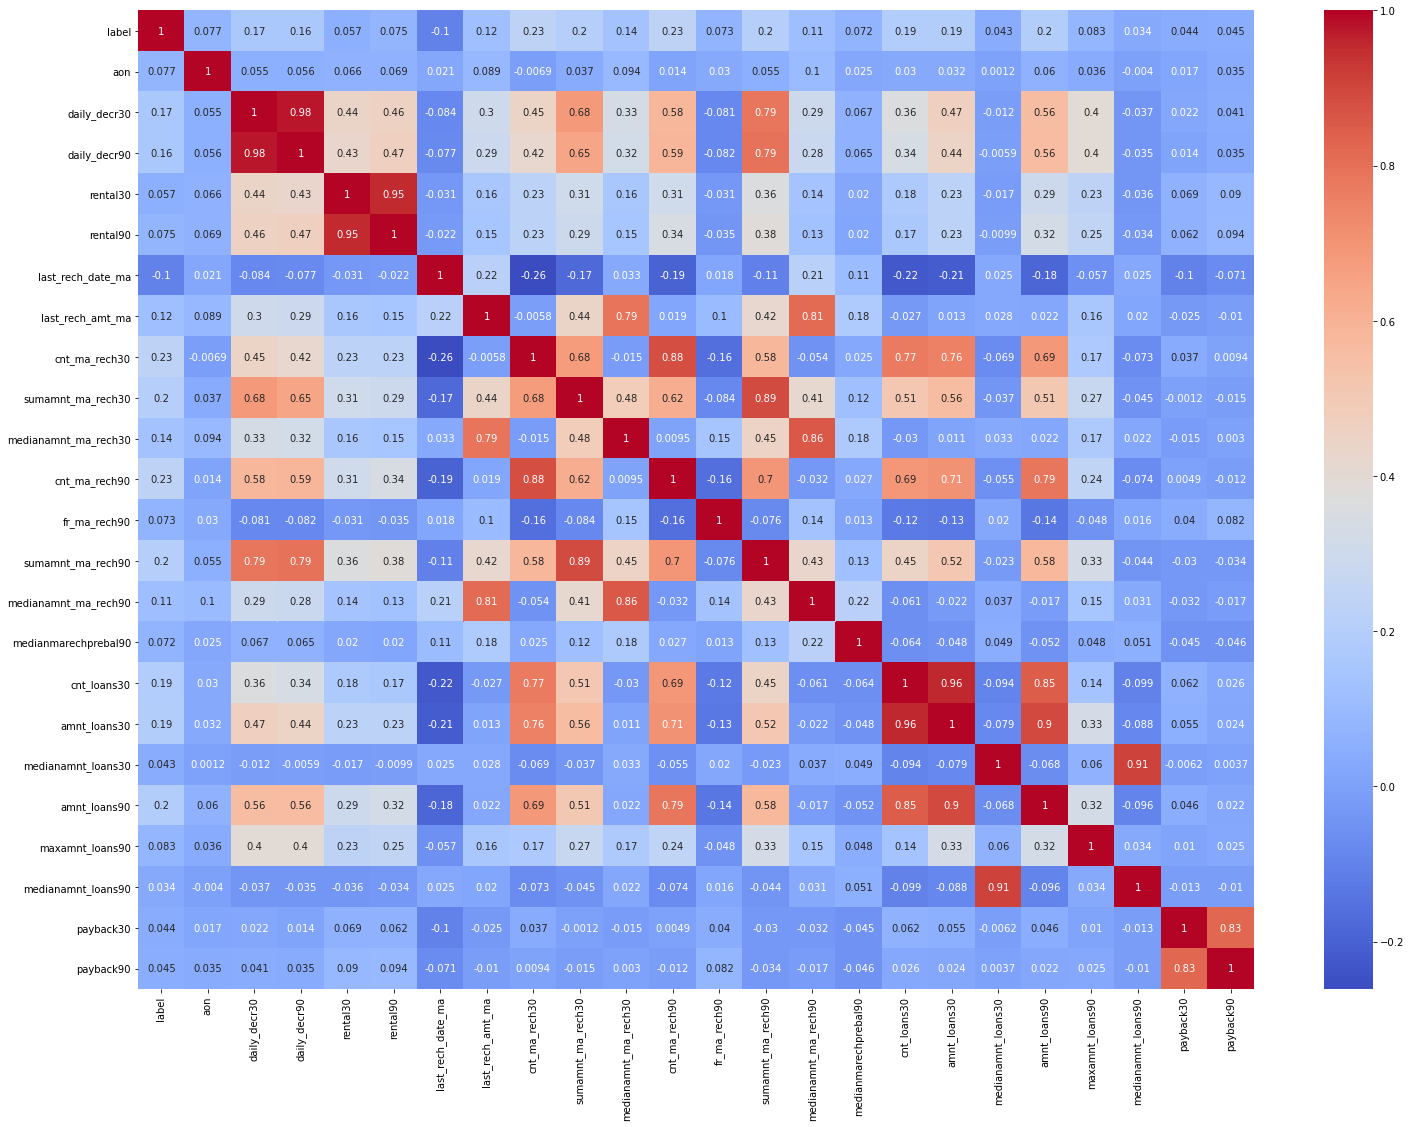

In [53]:
cor = df2.corr()

plt.figure(figsize=(25,18))
sns.heatmap(cor,annot=True,cmap="coolwarm")
plt.show()

In [54]:
# dropping - daily_decr90, rental30, cnt_ma_rechg90, sumamnt_ma_rechg90, medianamnt_ma_rechg30, amnt_loans30,cnt_loans_30
# medianamnt_loans90, payback30
df2.columns

Index(['label', 'aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_date_ma', 'last_rech_amt_ma', 'cnt_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'cnt_ma_rech90',
       'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90',
       'medianmarechprebal90', 'cnt_loans30', 'amnt_loans30',
       'medianamnt_loans30', 'amnt_loans90', 'maxamnt_loans90',
       'medianamnt_loans90', 'payback30', 'payback90'],
      dtype='object')

In [55]:
df2 = df2[['label', 'aon', 'daily_decr30', 'rental90', 'last_rech_date_ma', 'last_rech_amt_ma', 'cnt_ma_rech30',
       'sumamnt_ma_rech30',  'fr_ma_rech90',  'medianamnt_ma_rech90', 'medianmarechprebal90',  'medianamnt_loans30',
           'amnt_loans90', 'maxamnt_loans90','payback90']]
df2.shape

(194063, 15)

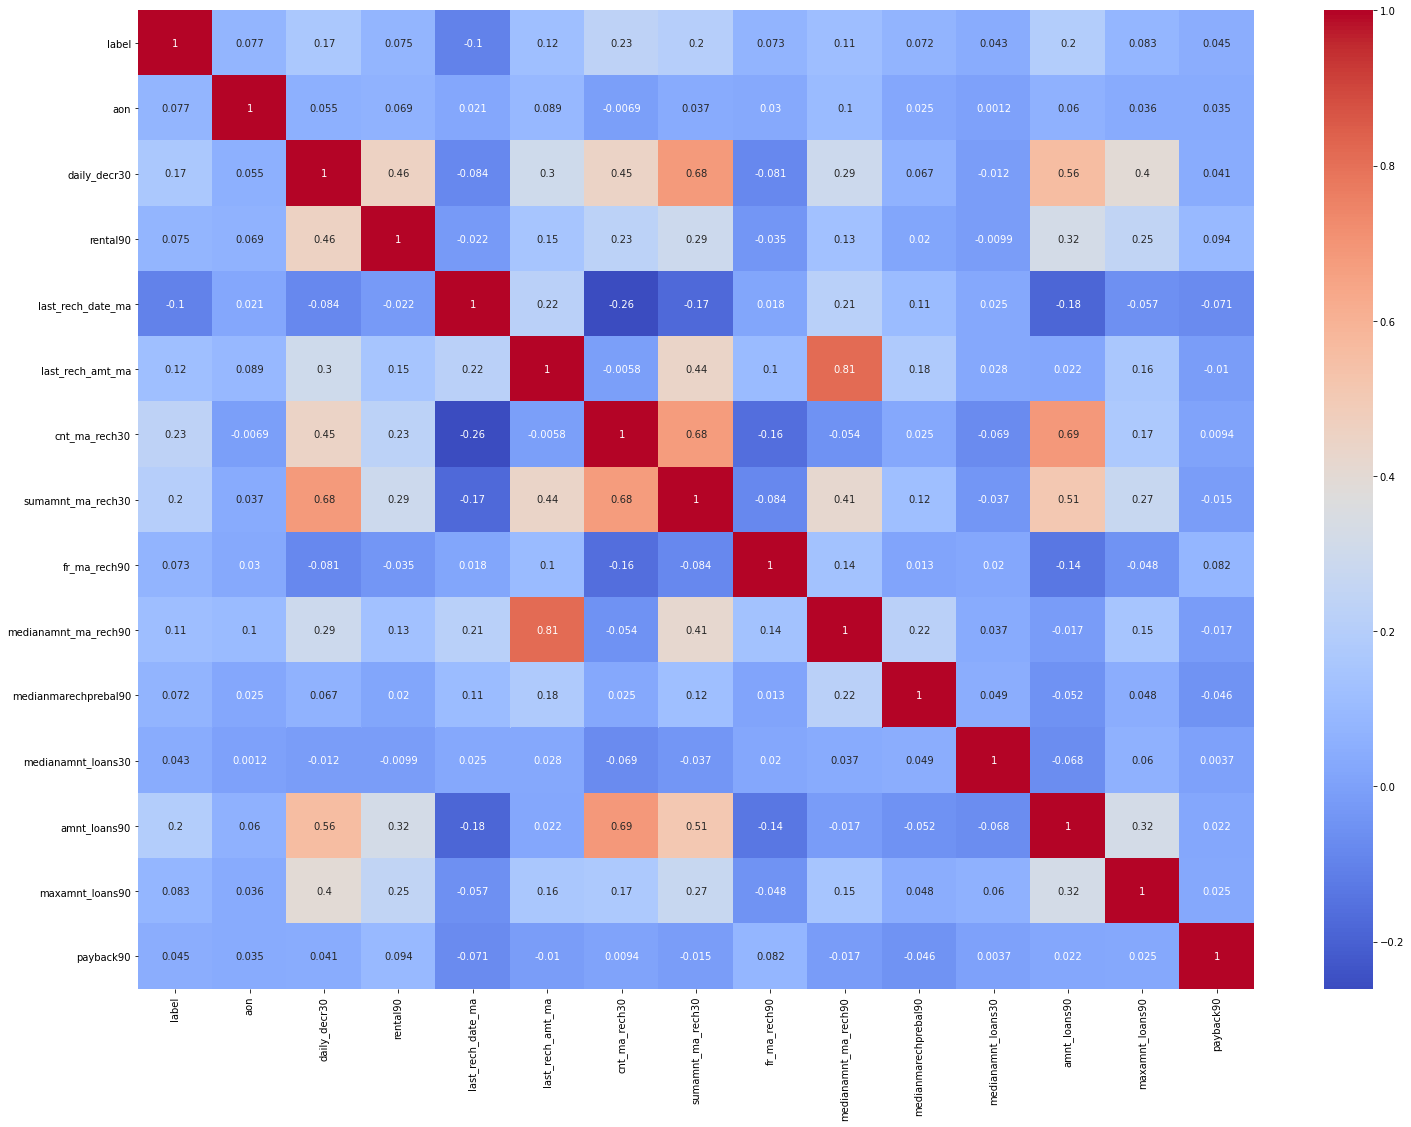

In [56]:
cor = df2.corr()

plt.figure(figsize=(25,18))
sns.heatmap(cor,annot=True,cmap="coolwarm")
plt.show()

In [57]:
df2.skew()

label                   -2.366946
aon                      0.961682
daily_decr30             3.814356
rental90                 4.396851
last_rech_date_ma        3.603384
last_rech_amt_ma         3.854173
cnt_ma_rech30            2.720848
sumamnt_ma_rech30        3.826910
fr_ma_rech90             2.305638
medianamnt_ma_rech90     3.634339
medianmarechprebal90    10.038194
medianamnt_loans30       4.591793
amnt_loans90             3.087668
maxamnt_loans90          1.619672
payback90                6.800673
dtype: float64

In [58]:
df2.medianmarechprebal90.max()

5253.0

In [59]:
df2.medianmarechprebal90.quantile(0.995)

1146.402700000002

In [60]:
df2.label.value_counts()

1    171147
0     22916
Name: label, dtype: int64

In [61]:
df2.shape

(194063, 15)

In [62]:
df2 = df2[df.medianmarechprebal90<=df2.medianmarechprebal90.quantile(0.995)]
print(df2.label.value_counts())

1    170257
0     22835
Name: label, dtype: int64


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [63]:
df2.shape

(193092, 15)

In [64]:
df2.skew()

label                  -2.364355
aon                     0.962522
daily_decr30            3.799383
rental90                4.398001
last_rech_date_ma       3.624316
last_rech_amt_ma        3.901708
cnt_ma_rech30           2.716288
sumamnt_ma_rech30       3.794188
fr_ma_rech90            2.306060
medianamnt_ma_rech90    3.662271
medianmarechprebal90    3.678199
medianamnt_loans30      4.603280
amnt_loans90            3.081431
maxamnt_loans90         1.629290
payback90               6.792362
dtype: float64

In [65]:
x = df2.drop(['label'],axis=1)
y = df2['label']

## 5. Preprocessing

In [66]:
x.head()

aon  daily_decr30  rental90  last_rech_date_ma  last_rech_amt_ma  \
0  272.0   3055.050000    260.13                2.0              1539   
1  712.0  12122.000000   3691.26               20.0              5787   
2  535.0   1398.000000    900.13                3.0              1539   
3  241.0     21.228000    159.42               41.0               947   
4  947.0    150.619333   1098.90                4.0              2309   

   cnt_ma_rech30  sumamnt_ma_rech30  fr_ma_rech90  medianamnt_ma_rech90  \
0              2             3078.0            21                1539.0   
1              1             5787.0             0                5787.0   
2              1             1539.0             0                1539.0   
3              0                0.0             0                 947.0   
4              7            20029.0             2                2888.0   

   medianmarechprebal90  medianamnt_loans30  amnt_loans90  maxamnt_loans90  \
0                  7.50                 0.0            12                6   
1                 61.04                 0.0            12               12   
2                 66.32                 0.0             6                6   
3                  2.50                 0.0            12                6   
4                 35.00                 0.0            42                6   

   payback90  
0  29.000000  
1   0.000000  
2   0.000000  
3   0.000000  
4   2.333333

#### train test split

In [67]:
from sklearn.model_selection import train_test_split
xtr,xts,ytr,yts = train_test_split(x,y,test_size=0.2,random_state=5,stratify=y)
print(x.shape)
print(xtr.shape)
print(xts.shape)
print(y.shape)
print(ytr.shape)
print(yts.shape)

(193092, 14)
(154473, 14)
(38619, 14)
(193092,)
(154473,)
(38619,)


In [68]:
print(y.mean(),ytr.mean(),yts.mean())


0.8817403103183975 0.8817398509771934 0.881742147647531


## 6. Apply ML - Decision Tree

In [69]:
from sklearn import tree
model = tree.DecisionTreeClassifier(random_state=5)
model.fit(xtr,ytr)

DecisionTreeClassifier(random_state=5)

## 7. Performance analysis

In [70]:
ypred = model.predict(xts)

In [71]:
from sklearn import metrics
metrics.accuracy_score(yts,ypred)

0.8664646935446283

In [72]:
pd.DataFrame(metrics.confusion_matrix(yts,ypred))

0      1
0  2133   2434
1  2723  31329

In [73]:
print(metrics.classification_report(yts,ypred))

              precision    recall  f1-score   support

           0       0.44      0.47      0.45      4567
           1       0.93      0.92      0.92     34052

    accuracy                           0.87     38619
   macro avg       0.68      0.69      0.69     38619
weighted avg       0.87      0.87      0.87     38619



In [74]:
model.feature_importances_

array([0.1266735 , 0.3326635 , 0.13704343, 0.05939924, 0.02395374,
       0.00945849, 0.09592064, 0.03900323, 0.02857287, 0.08023317,
       0.00778947, 0.02604316, 0.00601003, 0.02723553])

In [75]:
np.argsort(model.feature_importances_)

array([12, 10,  5,  4, 11, 13,  8,  7,  3,  9,  6,  0,  2,  1],
      dtype=int64)

In [76]:
for i in np.argsort(model.feature_importances_): print(x.columns[i])

maxamnt_loans90
medianamnt_loans30
cnt_ma_rech30
last_rech_amt_ma
amnt_loans90
payback90
medianamnt_ma_rech90
fr_ma_rech90
last_rech_date_ma
medianmarechprebal90
sumamnt_ma_rech30
aon
rental90
daily_decr30


In [92]:
model = tree.DecisionTreeClassifier(max_depth=15,min_samples_leaf=20,random_state=5,criterion='gini')
model.fit(xtr,ytr)


features = x.columns
label = ["not paid","paid"]

import graphviz

graphdata = tree.export_graphviz(model,feature_names=features,class_names=label,
                                rounded=True,filled=True)

graph = graphviz.Source(graphdata)
graph

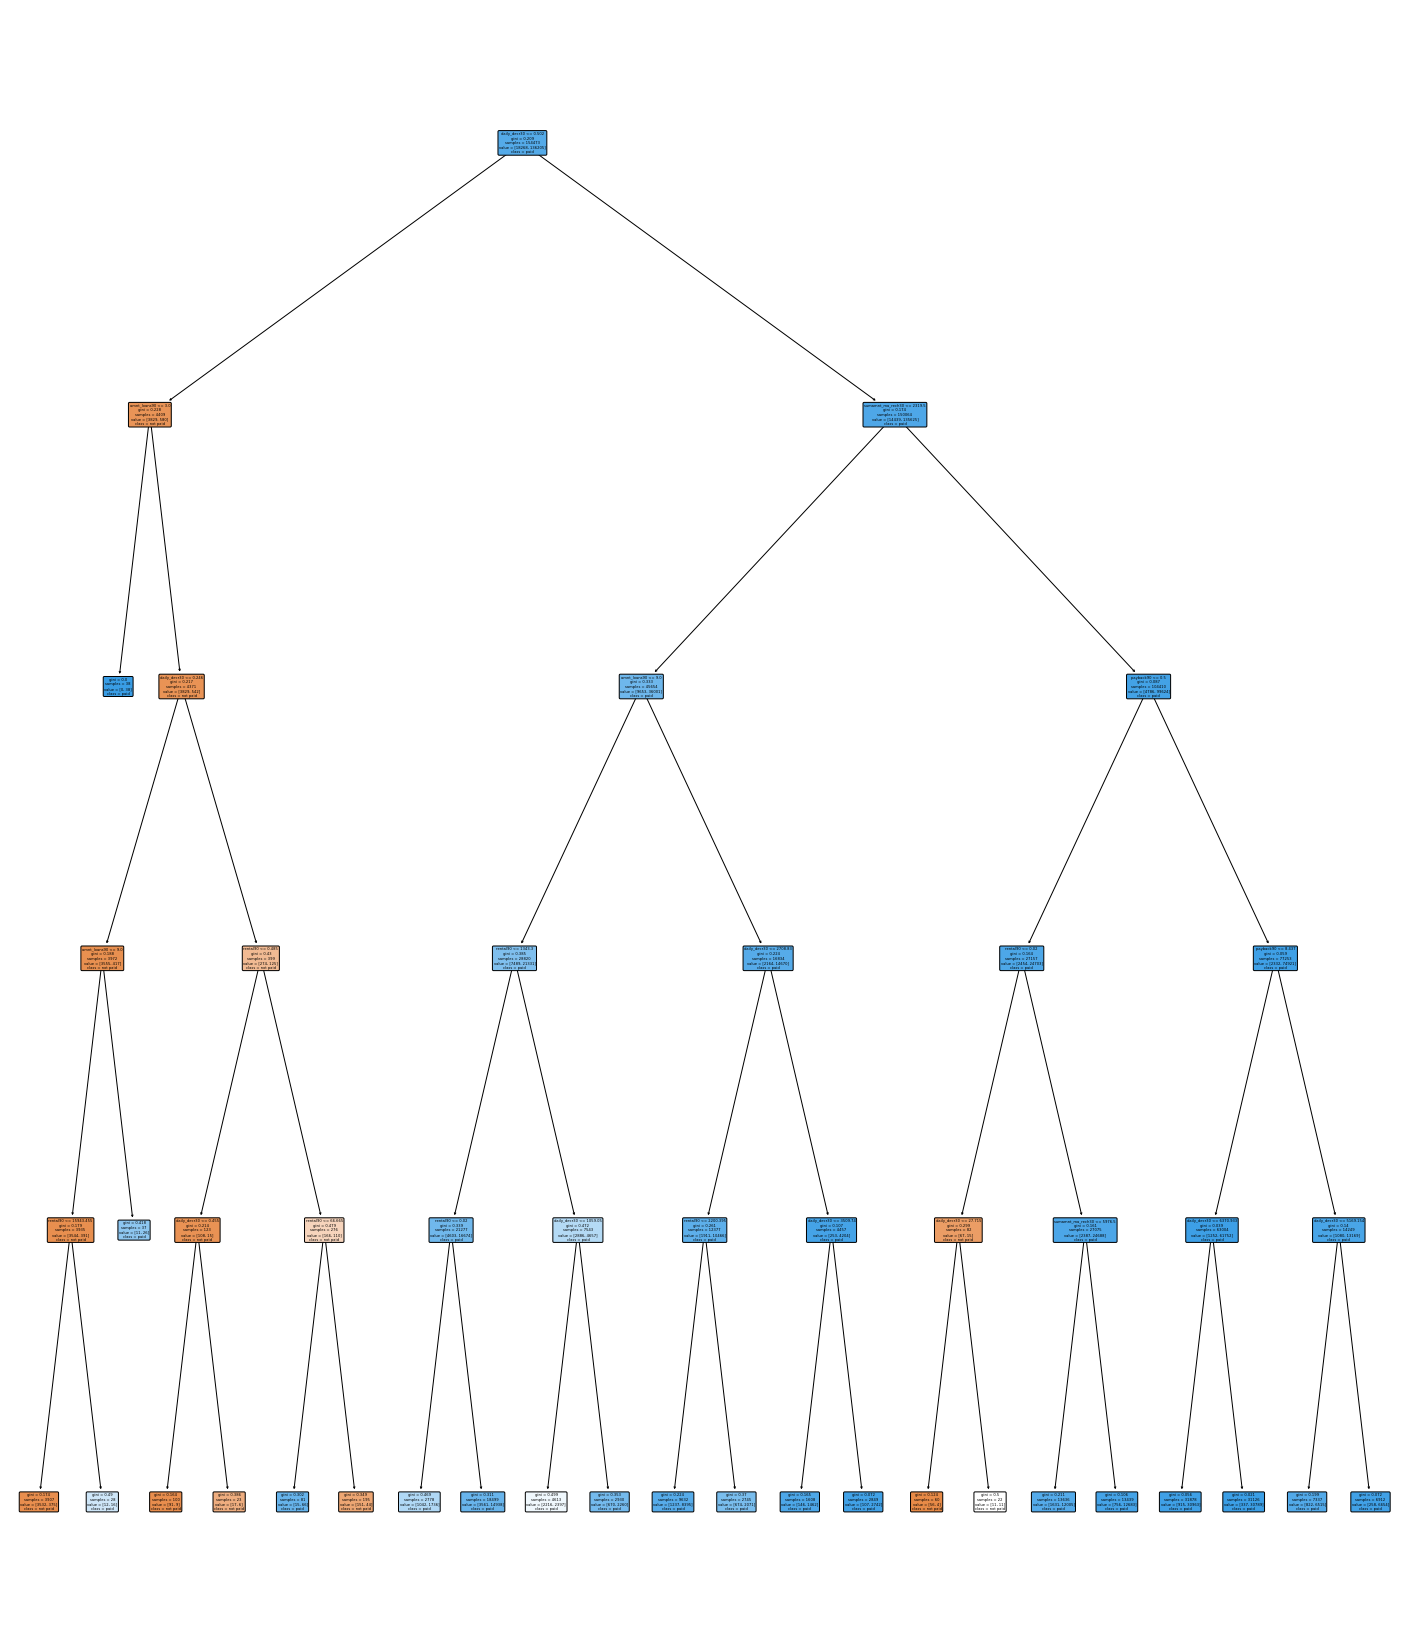

In [78]:
plt.figure(figsize=(25,30))
_ = tree.plot_tree(model,feature_names=features,class_names=label,
                                rounded=True,filled=True)
plt.show()

C:\Users\anshu\AppData\Roaming\Python\Python37\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


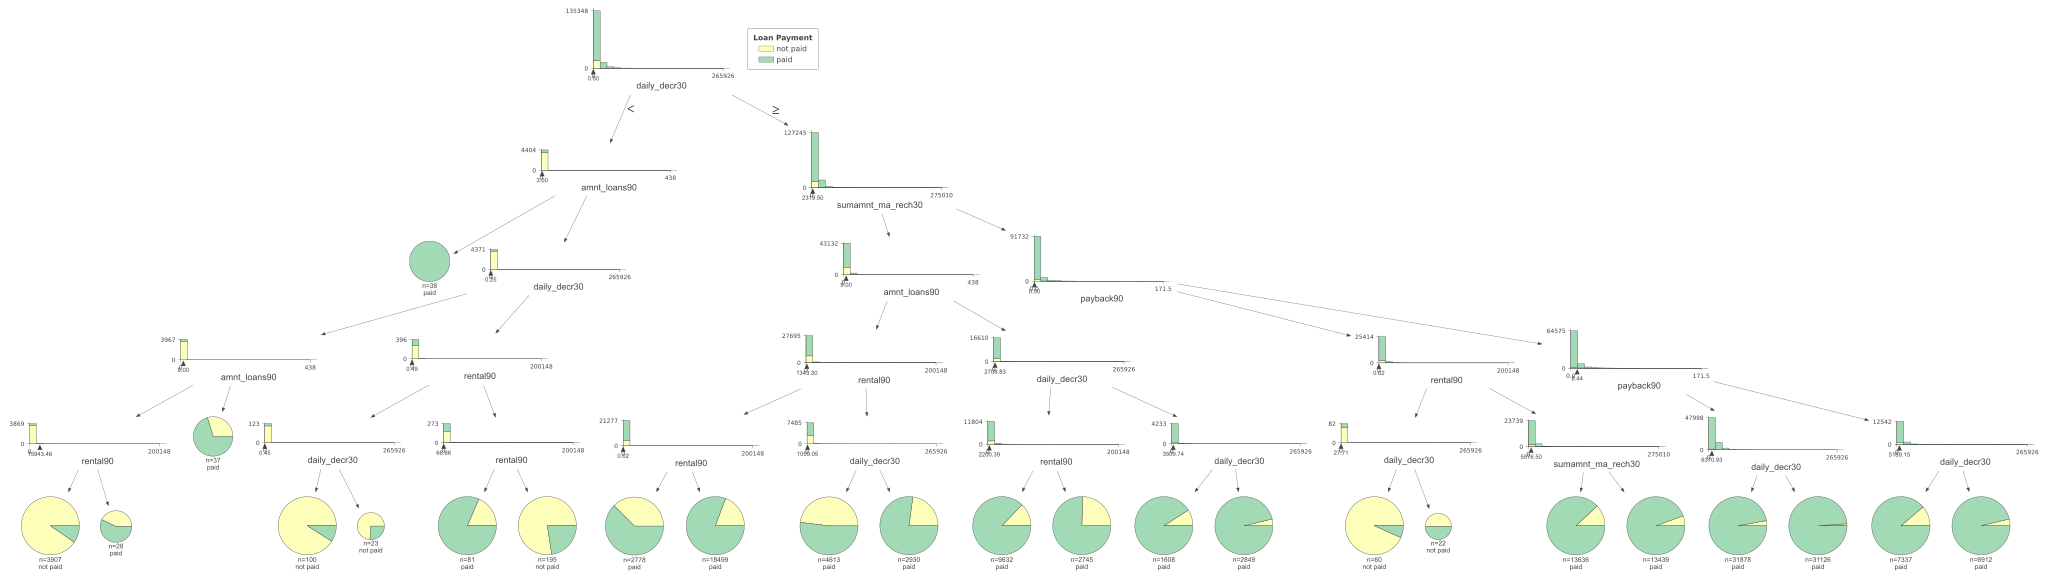

In [79]:
# pip install dtreeviz
from dtreeviz.trees import dtreeviz

viz = dtreeviz(model,xtr,ytr,target_name="Loan Payment",feature_names=features,class_names=label)
viz

## 6. Apply ML - Decision Tree

In [80]:
from sklearn import tree
model = tree.DecisionTreeClassifier(random_state=5)
model.fit(xtr,ytr)

DecisionTreeClassifier(random_state=5)

## 7. Performance analysis

In [84]:
ypred = model.predict(xts)
print(metrics.accuracy_score(yts,ypred))
print(metrics.classification_report(yts,ypred))

0.8664646935446283
              precision    recall  f1-score   support

           0       0.44      0.47      0.45      4567
           1       0.93      0.92      0.92     34052

    accuracy                           0.87     38619
   macro avg       0.68      0.69      0.69     38619
weighted avg       0.87      0.87      0.87     38619



In [85]:
ypred = model.predict(xtr)
print(metrics.accuracy_score(ytr,ypred))
print(metrics.classification_report(ytr,ypred))

0.9996180562298913
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18268
           1       1.00      1.00      1.00    136205

    accuracy                           1.00    154473
   macro avg       1.00      1.00      1.00    154473
weighted avg       1.00      1.00      1.00    154473



## 6. Apply ML - Decision Tree

In [89]:
from sklearn import tree
model = tree.DecisionTreeClassifier(random_state=5,max_depth=12,min_samples_leaf=30,min_samples_split = 80,
                                    min_impurity_decrease=0.0002)
model.fit(xtr,ytr)

DecisionTreeClassifier(max_depth=12, min_impurity_decrease=0.0002,
                       min_samples_leaf=30, min_samples_split=80,
                       random_state=5)

## 7. Performance analysis

In [90]:
ypred = model.predict(xts)

dftest = xts.copy()
dftest['predictions'] = ypred
dftest['Actuals'] = yts

print(metrics.accuracy_score(yts,ypred))
print(metrics.classification_report(yts,ypred))

0.9106916284730314
              precision    recall  f1-score   support

           0       0.75      0.37      0.49      4567
           1       0.92      0.98      0.95     34052

    accuracy                           0.91     38619
   macro avg       0.84      0.67      0.72     38619
weighted avg       0.90      0.91      0.90     38619



In [91]:
ypred = model.predict(xtr)
print(metrics.accuracy_score(ytr,ypred))
print(metrics.classification_report(ytr,ypred))

0.9104309490979006
              precision    recall  f1-score   support

           0       0.75      0.37      0.49     18268
           1       0.92      0.98      0.95    136205

    accuracy                           0.91    154473
   macro avg       0.83      0.68      0.72    154473
weighted avg       0.90      0.91      0.90    154473



### Overfitting

    A model is overfitting when - 
        - performance on train data = high
        - performance on test data  = low
        
        
    Why overfitting occurs?
        - Presence on noisy observations, outliers, unwanted columns
        - Less volume of data ( number of rows are less )
        - A lot of irrelevant features are present
        - the algorithm is more complex for the current use case
        
    How to deal with overfitting?
        - Perform data cleaning to get rid of outliers / noisy observations
        - Collect more data - collect more rows, no need to collect more columns
        - Drop some irrelevant features
        - Try a simpler learning algorithm
        - Tune hyperparameters of Decision Tree algorithm - decrease the values of max parameters such as max_depth, increase the values of min parameters such as min_samples_leaf

### Underfitting

    A model is underfitting when - 
        - performance on train data = low
        - performance on test data = low
        
    Why underfitting occurs?
        - Less informative features ( the columns available are not having much linear/non linear relation with label)
        - the learning algorithm is less powerful/efficient compared to complexity of patterns in data
    
    How to deal with underfitting?
        - COllect more columns (no need to collect more rows)
        - Try a more complex learning algorithm
        - Tune hyperparameters of Decision Tree algorithm - increase the values of max parameters such as max_depth, decrease the values of min parameters such as min_samples_leaf

### Hyperparameter Tuning

In [98]:
from sklearn.model_selection import GridSearchCV

params = {"max_depth":np.arange(5,20,3),
         "min_samples_leaf":np.arange(10,70,5),
         "min_samples_split":np.arange(20,100,10)}
params

{'max_depth': array([ 5,  8, 11, 14, 17]),
 'min_samples_leaf': array([10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65]),
 'min_samples_split': array([20, 30, 40, 50, 60, 70, 80, 90])}

In [100]:
search = GridSearchCV(tree.DecisionTreeClassifier(criterion='gini',random_state=5),
                     param_grid=params,scoring='f1',n_jobs=-1,cv=3,verbose=True)
search.fit(x,y)

Fitting 3 folds for each of 480 candidates, totalling 1440 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=5), n_jobs=-1,
             param_grid={'max_depth': array([ 5,  8, 11, 14, 17]),
                         'min_samples_leaf': array([10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65]),
                         'min_samples_split': array([20, 30, 40, 50, 60, 70, 80, 90])},
             scoring='f1', verbose=True)

In [101]:
search.best_score_

0.9508894456086668

In [102]:
search.best_params_

{'max_depth': 11, 'min_samples_leaf': 20, 'min_samples_split': 90}

In [103]:
from sklearn import tree
model = tree.DecisionTreeClassifier(random_state=5,max_depth=11,min_samples_leaf=20,min_samples_split = 90)
model.fit(xtr,ytr)

DecisionTreeClassifier(max_depth=11, min_samples_leaf=20, min_samples_split=90,
                       random_state=5)

In [104]:
ypred = model.predict(xts)

dftest = xts.copy()
dftest['predictions'] = ypred
dftest['Actuals'] = yts

print(metrics.accuracy_score(yts,ypred))
print(metrics.classification_report(yts,ypred))

0.9128926176234496
              precision    recall  f1-score   support

           0       0.75      0.39      0.52      4567
           1       0.92      0.98      0.95     34052

    accuracy                           0.91     38619
   macro avg       0.84      0.69      0.73     38619
weighted avg       0.90      0.91      0.90     38619



In [105]:
ypred = model.predict(xtr)
print(metrics.accuracy_score(ytr,ypred))
print(metrics.classification_report(ytr,ypred))

0.915124325933982
              precision    recall  f1-score   support

           0       0.76      0.41      0.53     18268
           1       0.93      0.98      0.95    136205

    accuracy                           0.92    154473
   macro avg       0.84      0.70      0.74    154473
weighted avg       0.91      0.92      0.90    154473



### Random Forest

In [106]:
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier(n_estimators=200,max_depth=11,min_samples_leaf=30,
                               min_samples_split=80,random_state=5,n_jobs=-1)
model2.fit(xtr,ytr)

RandomForestClassifier(max_depth=11, min_samples_leaf=30, min_samples_split=80,
                       n_estimators=200, random_state=5)

In [108]:
ypred = model2.predict(xts)

dftest = xts.copy()
dftest['predictions'] = ypred
dftest['Actuals'] = yts

print(metrics.accuracy_score(yts,ypred))
print(metrics.classification_report(yts,ypred))

ypred = model2.predict(xtr)
print(metrics.accuracy_score(ytr,ypred))
print(metrics.classification_report(ytr,ypred))

0.9090603071027215
              precision    recall  f1-score   support

           0       0.85      0.28      0.42      4567
           1       0.91      0.99      0.95     34052

    accuracy                           0.91     38619
   macro avg       0.88      0.64      0.69     38619
weighted avg       0.90      0.91      0.89     38619

0.9088772795245771
              precision    recall  f1-score   support

           0       0.85      0.28      0.42     18268
           1       0.91      0.99      0.95    136205

    accuracy                           0.91    154473
   macro avg       0.88      0.64      0.69    154473
weighted avg       0.90      0.91      0.89    154473



In [109]:
model2.feature_importances_

array([0.01556458, 0.35565701, 0.07070962, 0.04556141, 0.04380274,
       0.08207227, 0.13238811, 0.03108774, 0.02482833, 0.06375605,
       0.00703569, 0.07194039, 0.01164769, 0.04394838])

### Adaboost

In [118]:
from sklearn.ensemble import AdaBoostClassifier
model3 = AdaBoostClassifier(n_estimators=200,base_estimator=tree.DecisionTreeClassifier(random_state=5,max_depth=2,
                                                                                       class_weight={0:0.83,1:0.17}))
model3.fit(xtr,ytr)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 0.83,
                                                                       1: 0.17},
                                                         max_depth=2,
                                                         random_state=5),
                   n_estimators=200)

In [119]:
ypred = model3.predict(xts)

dftest = xts.copy()
dftest['predictions'] = ypred
dftest['Actuals'] = yts

print(metrics.accuracy_score(yts,ypred))
print(metrics.classification_report(yts,ypred))

ypred = model3.predict(xtr)
print(metrics.accuracy_score(ytr,ypred))
print(metrics.classification_report(ytr,ypred))

0.8525337269219814
              precision    recall  f1-score   support

           0       0.43      0.73      0.54      4567
           1       0.96      0.87      0.91     34052

    accuracy                           0.85     38619
   macro avg       0.69      0.80      0.72     38619
weighted avg       0.90      0.85      0.87     38619

0.8569394004130172
              precision    recall  f1-score   support

           0       0.44      0.75      0.55     18268
           1       0.96      0.87      0.91    136205

    accuracy                           0.86    154473
   macro avg       0.70      0.81      0.73    154473
weighted avg       0.90      0.86      0.87    154473



### Gradient Boosting Trees

In [120]:
from sklearn.ensemble import GradientBoostingClassifier
model4 = GradientBoostingClassifier(n_estimators=200,max_depth=3,random_state=5)
model4.fit(xtr,ytr)

GradientBoostingClassifier(n_estimators=200, random_state=5)

In [121]:
ypred = model4.predict(xts)

dftest = xts.copy()
dftest['predictions'] = ypred
dftest['Actuals'] = yts

print(metrics.accuracy_score(yts,ypred))
print(metrics.classification_report(yts,ypred))

ypred = model4.predict(xtr)
print(metrics.accuracy_score(ytr,ypred))
print(metrics.classification_report(ytr,ypred))

0.9138765892436366
              precision    recall  f1-score   support

           0       0.79      0.37      0.50      4567
           1       0.92      0.99      0.95     34052

    accuracy                           0.91     38619
   macro avg       0.86      0.68      0.73     38619
weighted avg       0.91      0.91      0.90     38619

0.9141079670880995
              precision    recall  f1-score   support

           0       0.79      0.37      0.51     18268
           1       0.92      0.99      0.95    136205

    accuracy                           0.91    154473
   macro avg       0.86      0.68      0.73    154473
weighted avg       0.91      0.91      0.90    154473



## XGBoost
    pip install xgboost

In [132]:
from xgboost import XGBClassifier
model5 = XGBClassifier(n_estimators=300,max_depth=2,random_state=5)
model5.fit(xtr,ytr)

XGBClassifier(max_depth=2, n_estimators=300, random_state=5)

In [133]:
ypred = model5.predict(xts)

dftest = xts.copy()
dftest['predictions'] = ypred
dftest['Actuals'] = yts

print(metrics.accuracy_score(yts,ypred))
print(metrics.classification_report(yts,ypred))

ypred = model5.predict(xtr)
print(metrics.accuracy_score(ytr,ypred))
print(metrics.classification_report(ytr,ypred))

0.9111836142831249
              precision    recall  f1-score   support

           0       0.80      0.33      0.47      4567
           1       0.92      0.99      0.95     34052

    accuracy                           0.91     38619
   macro avg       0.86      0.66      0.71     38619
weighted avg       0.90      0.91      0.89     38619

0.9110847850433409
              precision    recall  f1-score   support

           0       0.80      0.33      0.47     18268
           1       0.92      0.99      0.95    136205

    accuracy                           0.91    154473
   macro avg       0.86      0.66      0.71    154473
weighted avg       0.90      0.91      0.89    154473



### Adaboost

In [134]:
from sklearn.ensemble import AdaBoostClassifier
model3 = AdaBoostClassifier(n_estimators=200,base_estimator=tree.DecisionTreeClassifier(random_state=5,max_depth=2))
model3.fit(xtr,ytr)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2,
                                                         random_state=5),
                   n_estimators=200)

In [135]:
ypred = model3.predict(xts)

dftest = xts.copy()
dftest['predictions'] = ypred
dftest['Actuals'] = yts

print(metrics.accuracy_score(yts,ypred))
print(metrics.classification_report(yts,ypred))

ypred = model3.predict(xtr)
print(metrics.accuracy_score(ytr,ypred))
print(metrics.classification_report(ytr,ypred))

0.9123229498433414
              precision    recall  f1-score   support

           0       0.74      0.40      0.52      4567
           1       0.92      0.98      0.95     34052

    accuracy                           0.91     38619
   macro avg       0.83      0.69      0.74     38619
weighted avg       0.90      0.91      0.90     38619

0.9135059201284367
              precision    recall  f1-score   support

           0       0.74      0.41      0.53     18268
           1       0.93      0.98      0.95    136205

    accuracy                           0.91    154473
   macro avg       0.83      0.70      0.74    154473
weighted avg       0.90      0.91      0.90    154473

